## Hypothesis
To predict the incentive level requested for raising thermostat settings for 2-3F 
    when being at home in summer.

### Filter: HomeSYN=1 (i.e., only use people who use A/C when being at home in summer)

Group IncHomeS and treat as categorical variable
1,2,3 -> 1
4,5 -> 2
6,7 -> 3
8 -> 4

In [1]:
options(digits=2);
# Read in the data
survey <- read.csv("DR_Survey2_Share_Complete.csv",header=T);
#populate missing values
survey$IncHomeS[survey$IncHomeS==99] = NA;

data <- survey[,-c(1:7)];

#We investigate only use people who use A/C when being at home in summer
data1 <- data[data$HomeSYN==1,-which(names(data) %in% c("HomeWYN","AwayWNY","HomeSYN","AwaySNY","City","Utility",
    "ReasonPos","ReasonNeg","NBillS","NBillW","valid1","valid2","valid","Attitude","Trust",
    "EnergyC","MCG", "MCBill","Frugal","ComfortS","ComfortW","SubN","PBC","ACYN","HeatYN","Latitude",
    "Longitude", "Job","hot","cold"))];
sort(names(survey))
table(survey$Job)
table(survey$Political)

[1] "ACYN"        "Age"         "Atti1"       "Atti2"       "Atti3"      
  [6] "Atti4"       "Attitude"    "AwayS"       "AwaySNY"     "AwayW"      
 [11] "AwayWNY"     "BillS"       "BillW"       "City"        "ComfNS1"    
 [16] "ComfNS2"     "ComfNS3"     "ComfNW1"     "ComfNW2"     "ComfortS"   
 [21] "ComfortW"    "CompR"       "ControlN1"   "ControlN2R"  "ControlN3"  
 [26] "ControlN4"   "ConvB1"      "ConvB2"      "ConvB3"      "ConvB4"     
 [31] "DeviceType"  "Educ"        "EmerRForm"   "EnergyC"     "EnergyC1"   
 [36] "EnergyC2"    "EnergyC3"    "EnergyC4"    "Ethnic"      "Frugal"     
 [41] "Frugal1"     "Frugal2"     "Frugal3"     "Gender"      "HTdevice"   
 [46] "HTsource"    "HabitC1"     "HabitC2"     "HabitC3"     "HabitC4"    
 [51] "HabitC5"     "HabitC6"     "HabitC7"     "HabitE1"     "HabitE2"    
 [56] "HabitE3"     "HeatYN"      "HomeS"       "HomeSYN"     "HomeW"      
 [61] "HomeWYN"     "HouseholdS"  "ID"          "INT1"        "INT2"       
 [66] "INT3"        "INT4"        "IncAutoS"    "IncAutoW"    "IncAwayS"   
 [71] "IncAwayW"    "IncDish"     "IncEmer10S"  "IncEmer10W"  "IncEmer30S" 
 [76] "IncEmer30W"  "IncHomeS"    "IncHomeW"    "IncWD"       "Income"     
 [81] "Job"         "Latitude"    "Longitude"   "MC1"         "MC2"        
 [86] "MC3"         "MC4"         "MC5"         "MCBill"      "MCG"        
 [91] "NBillS"      "NBillW"      "OwnRent"     "PBC"         "PBC1"       
 [96] "PBC2"        "PBC3R"       "PBC4"        "PBC5"        "PBillStatus"
[101] "Political"   "ReasonNeg"   "ReasonPos"   "RewardForm"  "SN1"        
[106] "SN2"         "SN3"         "SN4"         "Sqft"        "SqftCate"   
[111] "State"       "SubN"        "SubNorm1"    "SubNorm2"    "SubNorm3"   
[116] "Trust"       "Trust1"      "Trust2"      "Trust3"      "Trust4"     
[121] "Utility"     "X.9to5"      "cold"        "hot"         "valid"      
[126] "valid1"      "valid2"


  1   2   3   4   5   6   7   8   9  10  11  12 
 99  79  33  33  25  64  86  71  43 112  22 156 


  1   2   3   4   5   6   7   8 
118  68 145 163  85  60  87  98 

In [2]:
#Frugal-Mean(Frugal1,Frugal2,Frugal3)
tmp <- cbind(Frugal1=data1$Frugal1,Frugal2=data1$Frugal2,Frugal3=data1$Frugal3)
print(dim(tmp))
data1$Frugal <- rowMeans(tmp)
data1 <- data1[,-which(names(data1) %in% c("Frugal1","Frugal2","Frugal3"))]
#print(data1)
table(data1$Political)

[1] 662   3



  1   2   3   4   5   6   7   8 
 92  55 113 128  70  54  73  76 

In [3]:
#MC-Mean(MC3,MC4,MC5)
tmp <- cbind(MC3=data1$MC3,MC4=data1$MC4,MC5=data1$MC5)
print(dim(tmp))
data1$MC <- rowMeans(tmp)
data1 <- data1[,-which(names(data1) %in% c("MC3","MC4","MC5"))]
#print(data1)

[1] 662   3


In [4]:
#EnergyC-Mean(EnergyC1,EnergyC2,EnergyC4)
tmp <- cbind(EnergyC1=data1$EnergyC1,EnergyC2=data1$EnergyC2,EnergyC4=data1$EnergyC4)
print(dim(tmp))
data1$EnergyC <- rowMeans(tmp)
data1 <- data1[,-which(names(data1) %in% c("EnergyC1","EnergyC2","EnergyC4"))]
#print(data1)

[1] 662   3


In [5]:
#Trust-Mean(Trust1,Trust2,Trust3,Trust4)
tmp <- cbind(Trust1=data1$Trust1,Trust2=data1$Trust2,Trust3=data1$Trust3,Trust4=data1$Trust4)
print(dim(tmp))
data1$Trust <- rowMeans(tmp)
data1 <- data1[,-which(names(data1) %in% c("Trust1","Trust2","Trust3","Trust4"))]
#print(data1)

[1] 662   4


In [6]:
#ComfNS-Mean(ComfNS1,ComfNS2,ComfNS3)
tmp <- cbind(ComfNS1=data1$ComfNS1,ComfNS2=data1$ComfNS2,ComfNS3=data1$ComfNS3)
print(dim(tmp))
data1$ComfNS <- rowMeans(tmp)
data1 <- data1[,-which(names(data1) %in% c("ComfNS1","ComfNS2","ComfNS3"))]
#print(data1)

[1] 662   3


In [7]:
#Attitude-Mean(Atti1,Atti2,Atti3,Atti4)
tmp <- cbind(Atti1=data1$Atti1,Atti2=data1$Atti2,Atti3=data1$Atti3,Atti4=data1$Atti4)
print(dim(tmp))
data1$Atti <- rowMeans(tmp)
data1 <- data1[,-which(names(data1) %in% c("Atti1","Atti2","Atti3","Atti4"))]
#print(data1)

[1] 662   4


In [8]:
#SubNorm-Mean(SubNorm1,SubNorm2,SubNorm3)
tmp <- cbind(SubNorm1=data1$SubNorm1,SubNorm=data1$SubNorm2,SubNorm3=data1$SubNorm3)
print(dim(tmp))
data1$SubNorm <- rowMeans(tmp)
data1 <- data1[,-which(names(data1) %in% c("SubNorm1","SubNorm2","SubNorm3"))]
#print(data1)

[1] 662   3


In [9]:
#PBC-Mean(PBC1,PBC2,PBC4,PBC5)
tmp <- cbind(PBC1=data1$PBC1,PBC2=data1$PBC2,PBC4=data1$PBC4,PBC5=data1$PBC5)
print(dim(tmp))
data1$PBC <- rowMeans(tmp)
data1 <- data1[,-which(names(data1) %in% c("PBC1","PBC2","PBC4","PBC5"))]
#print(data1)

[1] 662   4


In [10]:
#SN-Mean(SN1,SN2,SN4)
tmp <- cbind(SN1=data1$SN1,SN=data1$SN2,SN4=data1$SN4)
print(dim(tmp))
data1$SN <- rowMeans(tmp)
data1 <- data1[,-which(names(data1) %in% c("SN1","SN2","SN4"))]
#print(data1)

[1] 662   3


In [11]:
#HabitG-Mean(HabitC1,HabitC2,HabitC3,HabitC4)
tmp <- cbind(HabitC1=data1$HabitC1,HabitC2=data1$HabitC2,HabitC3=data1$HabitC3,HabitC4=data1$HabitC4)
print(dim(tmp))
data1$HabitG <- rowMeans(tmp)
data1 <- data1[,-which(names(data1) %in% c("HabitC1","HabitC2","HabitC4","HabitC5"))]
#print(data1)

[1] 662   4


In [12]:
#HabitHC-Mean(HabitC5,HabitC6,HabitC7)
tmp <- cbind(HabitC5=data1$HabitC5,HabitC6=data1$HabitC6,HabitC7=data1$HabitC7)
print(dim(tmp))
data1$HabitC <- rowMeans(tmp)
data1 <- data1[,-which(names(data1) %in% c("HabitC5","HabitC6","HabitC7"))]
#print(data1)

[1] 662   2


In [13]:
#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

[1] "HomeW" "28"   
[1] "AwayW" "87"   
[1] "AwayS" "101"  
[1] "IncHomeS" "8"       
[1] "IncWD" "56"   
[1] "IncDish" "183"    
[1] "Age" "4"  
[1] "Income" "3"     
[1] "Educ" "5"   


In [14]:
#lets remover these
data2 <- data1[,-which(names(data1) %in% c("HomeW","AwayW",
                    "AwayS","IncWD","IncDish"))];
print(dim(data2))
data2 <- na.omit(data2)
print(dim(data2))
#table(data2$Political)

[1] 662  60
[1] 644  60


In [15]:
#Political (Categorical- recode 5,6,7 as “1”-republican, 
                        #recode 4,8 as “2”- apolitical, 
                        #recode 1,2,3 as “3”- democrat)
table(data2$Political)
data2$Political[data2$Political==1]=3 #democrat
data2$Political[data2$Political==2]=3 #democrat
data2$Political[data2$Political==3]=3 #democrat
data2$Political[data2$Political==4]=2 #apolitical
data2$Political[data2$Political==8]=2 #apolitical
data2$Political[data2$Political==5]=1 #republican
data2$Political[data2$Political==6]=1 #republican
data2$Political[data2$Political==7]=1 #republican
table(data2$Political)


  1   2   3   4   5   6   7   8 
 90  53 109 127  67  52  71  75 


  1   2   3 
190 202 252 

In [16]:
#data2$Ethnic
#Ethnic (Categorical- keep 1 as “1”- white; group and recode all others as “0”- non white)
table(data2$Ethnic)
data2$Ethnic[data2$Ethnic==1]=1 #white
data2$Ethnic[data2$Ethnic==2]=0 #non-white
data2$Ethnic[data2$Ethnic==3]=0
data2$Ethnic[data2$Ethnic==4]=0
data2$Ethnic[data2$Ethnic==5]=0
data2$Ethnic[data2$Ethnic==6]=0
data2$Ethnic[data2$Ethnic==7]=0
table(data2$Ethnic)


  1   2   3   4   5   6   7 
533  34  27   3  31  14   2 


  0   1 
111 533 

In [17]:
table(data2$IncHomeS)

data2$IncHomeS[data2$IncHomeS==1]=1
data2$IncHomeS[data2$IncHomeS==2]=1
data2$IncHomeS[data2$IncHomeS==3]=1
data2$IncHomeS[data2$IncHomeS==4]=2
data2$IncHomeS[data2$IncHomeS==5]=2
data2$IncHomeS[data2$IncHomeS==6]=3
data2$IncHomeS[data2$IncHomeS==7]=3
data2$IncHomeS[data2$IncHomeS==8]=4

table(data2$IncHomeS)


  1   2   3   4   5   6   7   8 
 54  43 124 218  56  63  50  36 


  1   2   3   4 
221 274 113  36 

In [18]:
#names(data2)
#These are only variables we really care about
IVS = c("Age",
"Gender",
"OwnRent",
"SqftCate",
"HouseholdS",
"Political",
"Ethnic",
"Income",
"Educ",
"Frugal",
"MC",
"EnergyC",
"Trust",
"ComfNS",
"Atti",
"SubNorm",
"PBC",
"SN",
"HabitG",
"HabitC")

In [19]:
sort(names(data2))
paste(sort(IVS))

[1] "Age"        "Atti"       "BillS"      "BillW"      "ComfNS"    
 [6] "ComfNW1"    "ComfNW2"    "ControlN1"  "ControlN2R" "ControlN3" 
[11] "ControlN4"  "ConvB1"     "ConvB2"     "ConvB3"     "ConvB4"    
[16] "Educ"       "EmerRForm"  "EnergyC"    "EnergyC3"   "Ethnic"    
[21] "Frugal"     "Gender"     "HabitC"     "HabitC3"    "HabitE1"   
[26] "HabitE2"    "HabitE3"    "HabitG"     "HomeS"      "HouseholdS"
[31] "INT1"       "INT2"       "INT3"       "INT4"       "IncAutoS"  
[36] "IncAutoW"   "IncAwayS"   "IncAwayW"   "IncEmer10S" "IncEmer10W"
[41] "IncEmer30S" "IncEmer30W" "IncHomeS"   "IncHomeW"   "Income"    
[46] "MC"         "MC1"        "MC2"        "OwnRent"    "PBC"       
[51] "PBC3R"      "Political"  "RewardForm" "SN"         "SN3"       
[56] "Sqft"       "SqftCate"   "State"      "SubNorm"    "Trust"

[1] "Age"        "Atti"       "ComfNS"     "Educ"       "EnergyC"   
 [6] "Ethnic"     "Frugal"     "Gender"     "HabitC"     "HabitG"    
[11] "HouseholdS" "Income"     "MC"         "OwnRent"    "PBC"       
[16] "Political"  "SN"         "SqftCate"   "SubNorm"    "Trust"

In [20]:
data1 <- data2[, which(names(data2) %in% c("IncHomeS",IVS))];

In [21]:
#Check to see if there are anymore missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

In [22]:
names(data1)

#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}
    
    
# What about high correlations?
hiCor <- function(x, level){
  res <- cor(x,method="spearman");
  res1 <- res; res1[res<0] <- -res[res < 0];
  for (i in 1:dim(x)[2]){
    res1[i,i] <- 0;
  }
  sel <- apply(res1,1,max,na.rm=T) > level;
  res[sel,sel];
}
#hiCor(data1,.75)

[1] "IncHomeS"   "Age"        "Gender"     "OwnRent"    "SqftCate"  
 [6] "HouseholdS" "Political"  "Ethnic"     "Income"     "Educ"      
[11] "Frugal"     "MC"         "EnergyC"    "Trust"      "ComfNS"    
[16] "Atti"       "SubNorm"    "PBC"        "SN"         "HabitG"    
[21] "HabitC"

In [23]:
data1 [is.na(data1$IncHomeS), ]

Warning message in cbind(f_parts$left, ellip_h, f_parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(f_parts$left, ellip_h, f_parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"Warning message in cbind(f_parts$left, ellip_h, f_parts$right, deparse.level = 0L):
"number of rows of result is not a multiple of vector length (arg 2)"

IncHomeS,Age,Gender,OwnRent,SqftCate,HouseholdS,Political,Ethnic,Income,Educ,...,MC,EnergyC,Trust,ComfNS,Atti,SubNorm,PBC,SN,HabitG,HabitC


In [24]:
summary(data1$IncHomeS)
table(data1$IncHomeS)
table(data1$HouseholdS)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0     1.0     2.0     1.9     2.0     4.0 


  1   2   3   4 
221 274 113  36 


  1   2   3   4   5 
 67 225 148 118  86 

In [25]:
data2 <- data1;
data2 <- na.omit(data2)
names(data2)

[1] "IncHomeS"   "Age"        "Gender"     "OwnRent"    "SqftCate"  
 [6] "HouseholdS" "Political"  "Ethnic"     "Income"     "Educ"      
[11] "Frugal"     "MC"         "EnergyC"    "Trust"      "ComfNS"    
[16] "Atti"       "SubNorm"    "PBC"        "SN"         "HabitG"    
[21] "HabitC"

In [26]:
#Check to see if there are anymore missing values
for (n in names(data2)){
    nmis = sum(is.na(data2[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data2[,n]))))
}

In [27]:
#convert all data to numeric values

sapply(data2,sd)

IncHomeS        Age     Gender    OwnRent   SqftCate HouseholdS  Political 
      0.86      11.19       0.50       0.52       1.11       1.21       0.82 
    Ethnic     Income       Educ     Frugal         MC    EnergyC      Trust 
      0.38       1.97       1.12       0.95       1.08       1.41       1.40 
    ComfNS       Atti    SubNorm        PBC         SN     HabitG     HabitC 
      1.45       1.11       1.34       0.95       1.41       1.18       1.60

In [28]:
hiCor(data2,.75)

<0 x 0 matrix>

In [29]:
res<-prcomp(data2, retx=F,scale=T)$rotation[,1:21];
resAbs <- res;
resAbs[res<0] <- -res[res<0];
z <- cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2)

for (i in 1:21){
  print(z[i]);
  print(t(res[resAbs[,i]>.2,i,drop=FALSE]));
}


[1] 0.16
    Frugal   MC EnergyC Atti SubNorm  PBC  SN HabitG HabitC
PC1   0.37 0.32    0.37 0.41    0.31 0.23 0.2   0.28   0.25
[1] 0.27
     Age OwnRent SqftCate HouseholdS Income
PC2 0.34    0.49     0.51       0.27   0.42
[1] 0.34
    IncHomeS Gender HouseholdS Income Educ ComfNS HabitC
PC3    -0.31  -0.34      -0.35   0.23 0.51  -0.45   0.24
[1] 0.4
     Age Gender HouseholdS Political Ethnic   MC EnergyC  PBC HabitG
PC4 0.22  -0.23      -0.34      -0.4   0.38 0.22   -0.26 0.37   0.26
[1] 0.47
    IncHomeS   Age HouseholdS Political  Educ EnergyC ComfNS HabitG HabitC
PC5     -0.4 -0.37       0.34     -0.32 -0.32   -0.24  -0.29   0.21   0.26
[1] 0.52
    IncHomeS Ethnic Frugal    MC Trust SubNorm   SN HabitC
PC6     0.35  -0.25  -0.27 -0.26  0.41    0.23 0.49   0.25
[1] 0.57
      Age Ethnic Educ Trust ComfNS SubNorm   SN HabitG HabitC
PC7 -0.36   0.39 0.21  0.27    0.3    0.25 0.23  -0.28  -0.35
[1] 0.62
    Gender Ethnic Income   MC Trust ComfNS  PBC
PC8  -0.55  -0.54   0.26 0.22

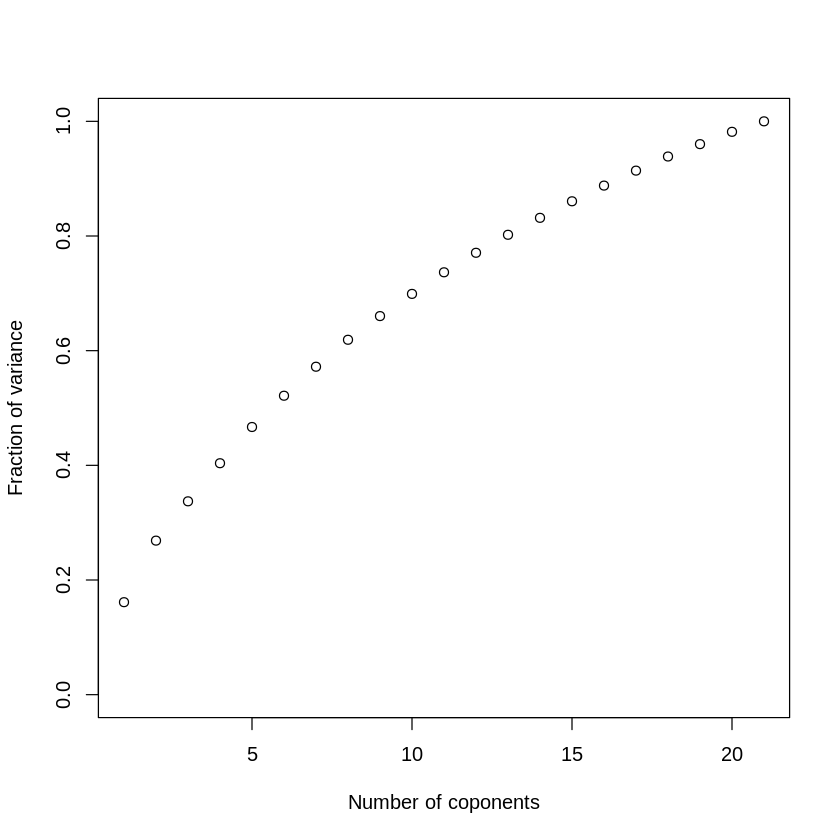

In [30]:
plot(1:dim(data2)[2],cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2),
     ylim=c(0,1),xlab="Number of coponents",
     ylab="Fraction of variance");

In [31]:
res <- c();
vnam <- names(data2);
for (i in 2:dim(data2)[2]){
  fmla <- as.formula(paste(vnam[i],paste(vnam[-c(1,i)],collapse="+"),sep="~"));
  res <- rbind(res,c(i,round(summary(lm(fmla,data=data2))$r.squared,2)));
}

In [32]:
row.names(res) <- vnam[res[,1]];
o = order(-res[,2]);
res[o,][res[o,2]<.7,]

Atti,16,0.46
EnergyC,13,0.43
Frugal,11,0.37
SqftCate,5,0.36
OwnRent,4,0.30
MC,12,0.30
HouseholdS,6,0.26
Income,9,0.25
SubNorm,17,0.25
HabitG,20,0.23
HabitC,21,0.23


In [33]:
IndepPred <- row.names(res[o,][res[o,2]<.7,])

In [34]:
IndepPred

[1] "Atti"       "EnergyC"    "Frugal"     "SqftCate"   "OwnRent"   
 [6] "MC"         "HouseholdS" "Income"     "SubNorm"    "HabitG"    
[11] "HabitC"     "Age"        "Educ"       "SN"         "PBC"       
[16] "Political"  "Gender"     "ComfNS"     "Trust"      "Ethnic"

In [35]:
fmla <- as.formula(paste("Age",paste(IndepPred,collapse="+"),sep="~"));

In [36]:
table(data2[,"IncHomeS"])


  1   2   3   4 
221 274 113  36 

In [37]:
mod = lm(fmla,data=data2)
summary(mod)

Warning message in model.matrix.default(mt, mf, contrasts):
"the response appeared on the right-hand side and was dropped"Warning message in model.matrix.default(mt, mf, contrasts):
"problem with term 12 in model.matrix: no columns are assigned"


Call:
lm(formula = fmla, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-24.29  -7.25  -1.66   5.87  33.52 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  10.2082     4.7497    2.15   0.0320 *  
Atti          1.1345     0.4928    2.30   0.0217 *  
EnergyC      -0.5092     0.3765   -1.35   0.1767    
Frugal        0.0177     0.5326    0.03   0.9735    
SqftCate      1.7592     0.4455    3.95  8.7e-05 ***
OwnRent       5.4892     0.9001    6.10  1.9e-09 ***
MC           -0.0125     0.4431   -0.03   0.9776    
HouseholdS   -1.7279     0.3765   -4.59  5.4e-06 ***
Income        0.2405     0.2354    1.02   0.3073    
SubNorm      -0.3085     0.3435   -0.90   0.3695    
HabitG        0.2248     0.3860    0.58   0.5605    
HabitC        0.2961     0.2839    1.04   0.2973    
Educ          0.6620     0.3944    1.68   0.0937 .  
SN           -0.1113     0.3149   -0.35   0.7238    
PBC           0.0600     0.4629    0.13   0.8968    
Political    

In [38]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Atti,1,6.0e+02,600.81,5.8171,1.6e-02
EnergyC,1,4.0e+02,403.11,3.9029,4.9e-02
Frugal,1,5.8e-01,0.58,0.0056,9.4e-01
SqftCate,1,5.1e+03,5118.27,49.5553,5.1e-12
OwnRent,1,4.8e+03,4792.42,46.4005,2.3e-11
MC,1,1.3e+01,13.44,0.1301,7.2e-01
HouseholdS,1,2.4e+03,2355.23,22.8035,2.2e-06
Income,1,1.4e+02,140.07,1.3562,2.4e-01
SubNorm,1,3.4e+01,33.87,0.3279,5.7e-01
HabitG,1,3.2e+01,31.74,0.3073,5.8e-01


In [39]:
fit <- factanal(data2, 2, rotation="varimax")
print(fit, digits=2, cutoff=.3, sort=TRUE)


Call:
factanal(x = data2, factors = 2, rotation = "varimax")

Uniquenesses:
  IncHomeS        Age     Gender    OwnRent   SqftCate HouseholdS  Political 
      0.97       0.85       0.94       0.59       0.46       0.87       0.92 
    Ethnic     Income       Educ     Frugal         MC    EnergyC      Trust 
      0.99       0.74       0.97       0.58       0.72       0.55       0.94 
    ComfNS       Atti    SubNorm        PBC         SN     HabitG     HabitC 
      0.96       0.42       0.77       0.88       0.88       0.83       0.88 

Loadings:
           Factor1 Factor2
Frugal      0.65          
MC          0.53          
EnergyC     0.67          
Atti        0.76          
OwnRent             0.64  
SqftCate            0.73  
Income              0.51  
IncHomeS                  
Age                 0.38  
Gender                    
HouseholdS          0.35  
Political                 
Ethnic                    
Educ                      
Trust                     
ComfNS      


Call:
lm(formula = IncHomeS ~ SqftCate, data = data2)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.9469 -0.9433  0.0549  0.0585  2.0585 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.9487     0.0847   23.00   <2e-16 ***
SqftCate     -0.0018     0.0305   -0.06     0.95    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.86 on 642 degrees of freedom
Multiple R-squared:  5.43e-06,	Adjusted R-squared:  -0.00155 
F-statistic: 0.00349 on 1 and 642 DF,  p-value: 0.953


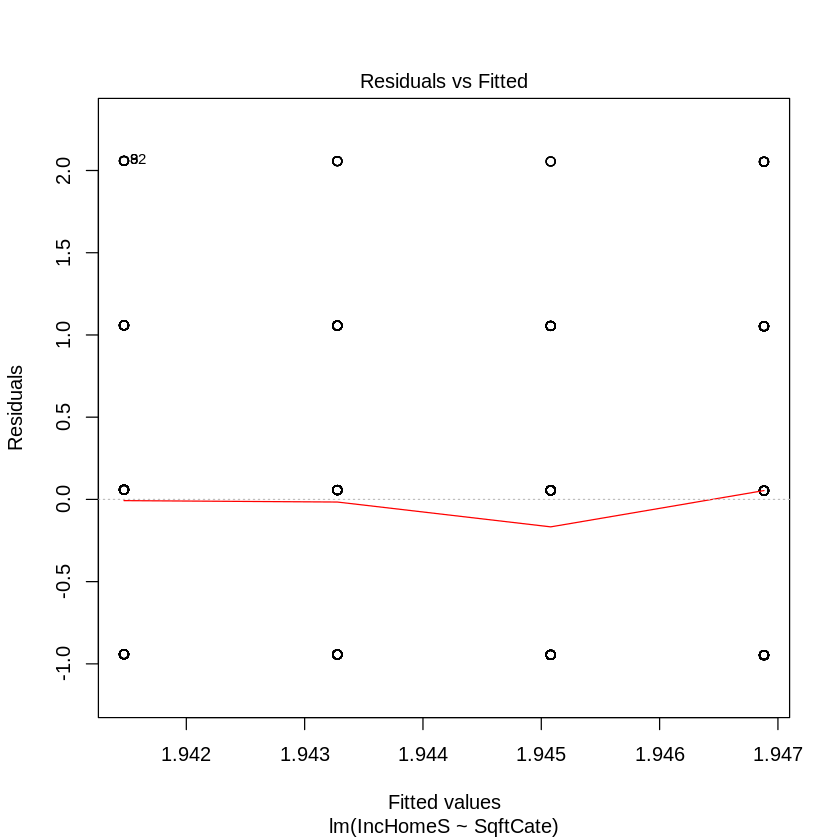

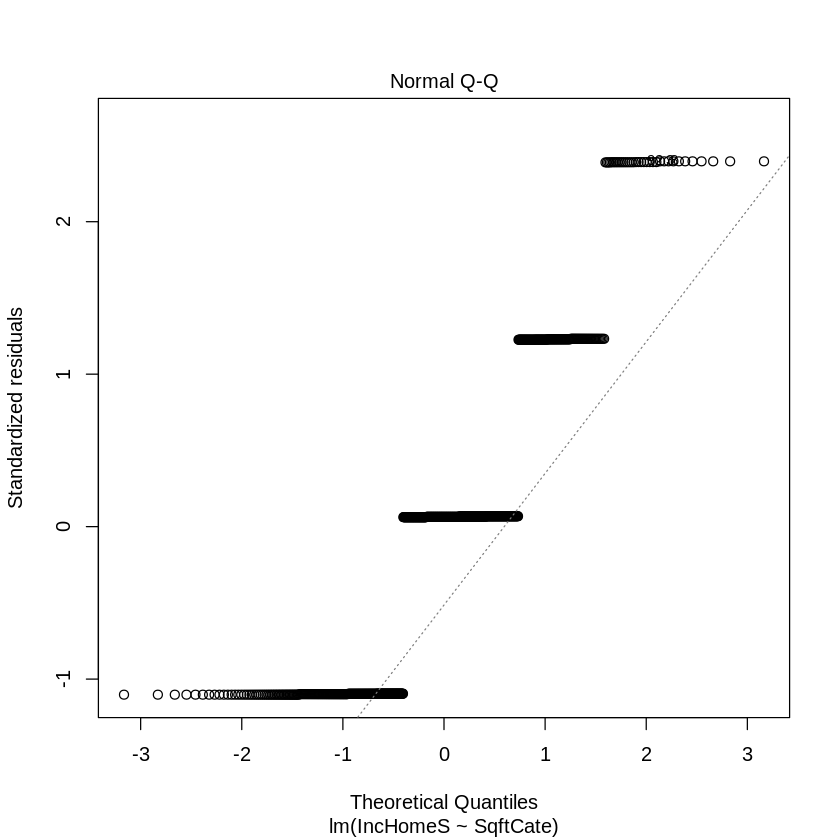

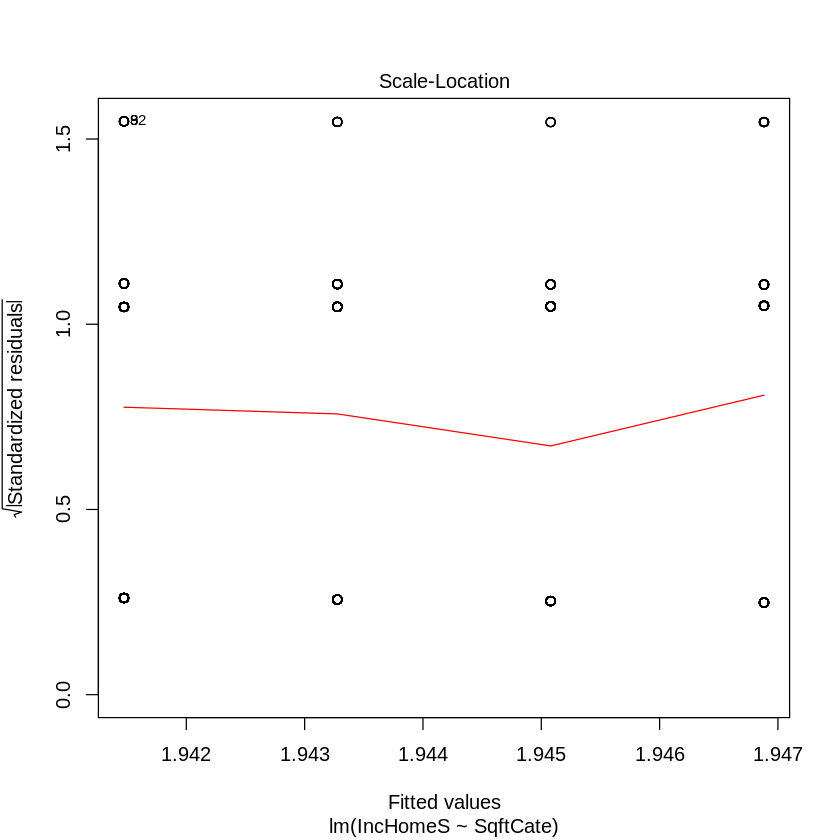

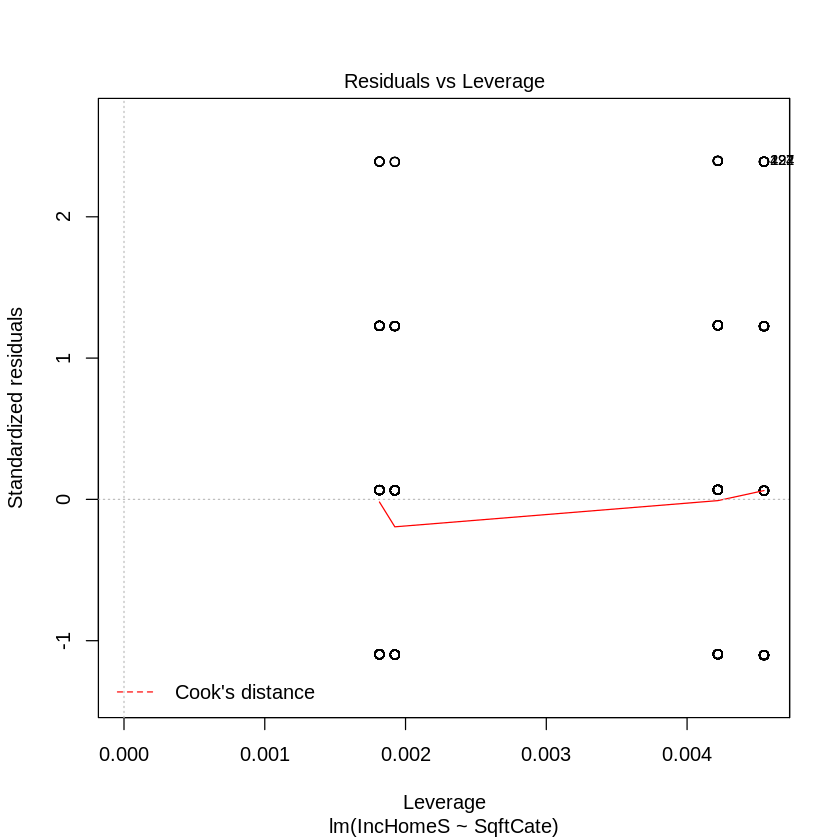

In [40]:
mod = lm(IncHomeS~SqftCate,data=data2)
summary(mod)
plot(mod)

ERROR: Error in xy.coords(x, y): 'x' and 'y' lengths differ


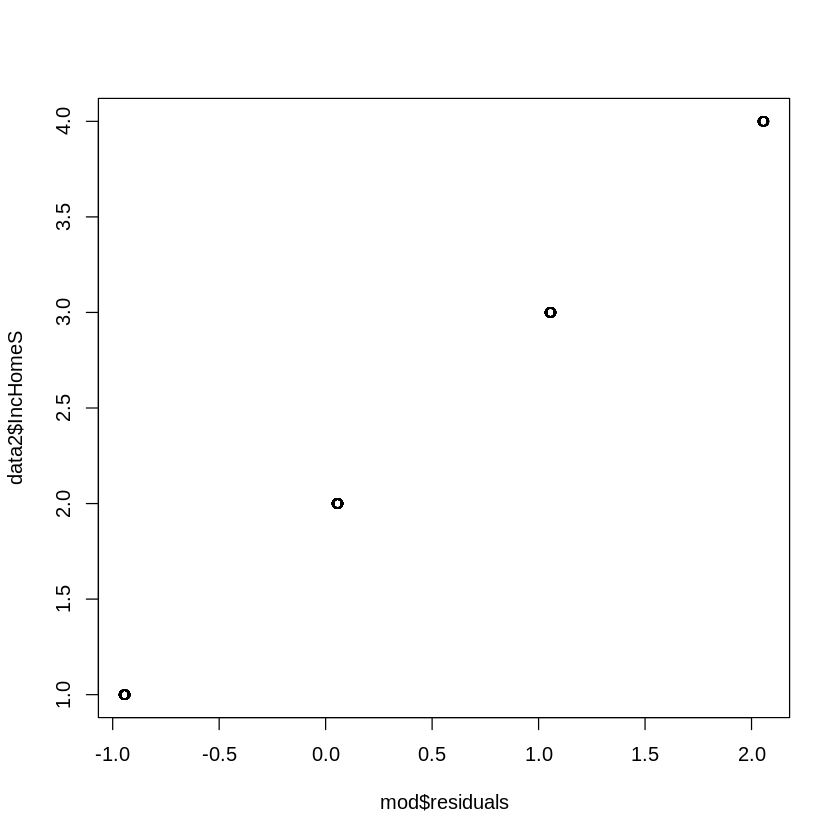

In [41]:
plot(mod$residuals,data2$IncHomeS)
z<-tapply(mod$residuals,data2$IncHomeS,mean)
points(z,1:8,pch="*",cex=3)

In [42]:
mod = lm(IncHomeS~SqftCate+OwnRent,data=data2)
summary(mod)


Call:
lm(formula = IncHomeS ~ SqftCate + OwnRent, data = data2)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.3010 -0.8938  0.0378  0.1351  2.1639 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.8255     0.1111   16.43   <2e-16 ***
SqftCate     -0.0289     0.0343   -0.84    0.401    
OwnRent       0.1261     0.0737    1.71    0.088 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.86 on 641 degrees of freedom
Multiple R-squared:  0.00455,	Adjusted R-squared:  0.00144 
F-statistic: 1.46 on 2 and 641 DF,  p-value: 0.232


In [43]:
#Probably overfitting
mod1 = lm(IncHomeS~SqftCate+OwnRent+HouseholdS,data=data2)
summary(mod1)


Call:
lm(formula = IncHomeS ~ SqftCate + OwnRent + HouseholdS, data = data2)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.2996 -0.8910  0.0315  0.1394  2.1576 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.81772    0.12467   14.58   <2e-16 ***
SqftCate    -0.03046    0.03626   -0.84    0.401    
OwnRent      0.12603    0.07379    1.71    0.088 .  
HouseholdS   0.00411    0.02993    0.14    0.891    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.86 on 640 degrees of freedom
Multiple R-squared:  0.00458,	Adjusted R-squared:  -8.86e-05 
F-statistic: 0.981 on 3 and 640 DF,  p-value: 0.401


In [44]:
library(mgcv)


Loading required package: nlme
This is mgcv 1.8-14. For overview type 'help("mgcv-package")'.


In [45]:
mGam = gam(IncHomeS~SqftCate+OwnRent+HouseholdS,data=data2)
summary(mGam)



Family: gaussian 
Link function: identity 

Formula:
IncHomeS ~ SqftCate + OwnRent + HouseholdS

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.81772    0.12467   14.58   <2e-16 ***
SqftCate    -0.03046    0.03626   -0.84    0.401    
OwnRent      0.12603    0.07379    1.71    0.088 .  
HouseholdS   0.00411    0.02993    0.14    0.891    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


R-sq.(adj) =  -8.86e-05   Deviance explained = 0.458%
GCV = 0.74495  Scale est. = 0.74033   n = 644

In [46]:
plot(mGam)

ERROR: Error in plot.gam(mGam): No terms to plot - nothing for plot.gam() to do.


In [47]:
mod1 = lm(IncHomeS~SqftCate+OwnRent+HouseholdS+Gender+ComfNS+Atti+Educ,data=data2)
summary(mod1)



Call:
lm(formula = IncHomeS ~ SqftCate + OwnRent + HouseholdS + Gender + 
    ComfNS + Atti + Educ, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-1.394 -0.700 -0.065  0.494  2.707 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.53250    0.28064    5.46  6.8e-08 ***
SqftCate    -0.03076    0.03497   -0.88   0.3794    
OwnRent      0.13319    0.07116    1.87   0.0617 .  
HouseholdS  -0.01327    0.02969   -0.45   0.6550    
Gender       0.09046    0.06789    1.33   0.1831    
ComfNS       0.14346    0.02280    6.29  5.8e-10 ***
Atti        -0.09064    0.03067   -2.96   0.0032 ** 
Educ        -0.00364    0.03007   -0.12   0.9038    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.83 on 636 degrees of freedom
Multiple R-squared:  0.0854,	Adjusted R-squared:  0.0753 
F-statistic: 8.48 on 7 and 636 DF,  p-value: 6.07e-10


In [48]:
anova(mod1)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
SqftCate,1,2.6e-03,0.0026,0.0038,9.5e-01
OwnRent,1,2.2e+00,2.1623,3.1588,7.6e-02
HouseholdS,1,1.4e-02,0.0139,0.0204,8.9e-01
Gender,1,4.6e-01,0.4610,0.6735,4.1e-01
ComfNS,1,3.2e+01,31.9486,46.6726,2.0e-11
Atti,1,6.0e+00,6.0308,8.8101,3.1e-03
Educ,1,1.0e-02,0.0100,0.0146,9.0e-01
Residuals,636,4.4e+02,0.6845,NA,NA


In [49]:
drop1(mod1)

,Df,Sum of Sq,RSS,AIC
<none>,NA,NA,435,-236
SqftCate,1,0.53,436,-237
OwnRent,1,2.40,438,-235
HouseholdS,1,0.14,435,-238
Gender,1,1.22,437,-236
ComfNS,1,27.11,462,-199
Atti,1,5.98,441,-229
Educ,1,0.01,435,-238


In [50]:
library(bnlearn)


Attaching package: 'bnlearn'

The following object is masked from 'package:stats':

    sigma



In [51]:
dd2 = data2[,c('IncHomeS', 'ComfNS3','Age','HabitC2')]
for (i in 1:4) dd2[,i] <- as.double(dd2[,i])
dag2 = tabu(dd2)
plot(dag2)

ERROR: Error in `[.data.frame`(data2, , c("IncHomeS", "ComfNS3", "Age", "HabitC2")): undefined columns selected


In [27]:
fmlaF <- as.formula(paste("IncHomeS",paste(IVS,collapse="+"),sep="~"));
mod = lm(fmlaF,data=data2)
summary(mod)


Call:
lm(formula = fmlaF, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-3.672 -1.120 -0.092  1.051  4.878 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept)  3.12e+00   1.26e+00    2.49   0.0132 * 
Age          2.37e-02   7.22e-03    3.28   0.0011 **
Gender       1.02e-01   1.56e-01    0.66   0.5117   
OwnRent     -1.93e-03   1.64e-01   -0.01   0.9906   
BillS        6.56e-04   1.27e-03    0.52   0.6060   
NBillS       1.30e-01   1.29e-01    1.01   0.3138   
Sqft        -3.13e-05   1.11e-04   -0.28   0.7776   
SqftCate    -3.01e-02   1.10e-01   -0.27   0.7853   
HouseholdS  -8.02e-02   6.84e-02   -1.17   0.2412   
Political   -6.80e-02   3.33e-02   -2.04   0.0417 * 
Ethnic       1.03e-01   6.05e-02    1.70   0.0901 . 
Income      -3.16e-02   4.24e-02   -0.74   0.4571   
Educ         2.87e-02   6.87e-02    0.42   0.6760   
MC1          2.52e-03   7.09e-02    0.04   0.9716   
MC2          3.68e-02   7.60e-02    0.48   0.6290   
MC3         

In [28]:
#Probably overfitting
mod1 = lm(IncHomeS~ComfNS3+Age+HabitC2+Political+Ethnic+Trust1,data=data2)
summary(mod1)


Call:
lm(formula = IncHomeS ~ ComfNS3 + Age + HabitC2 + Political + 
    Ethnic + Trust1, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-4.518 -1.152 -0.131  1.015  4.526 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.53367    0.43662    5.80  1.0e-08 ***
ComfNS3      0.28415    0.03962    7.17  2.1e-12 ***
Age          0.02216    0.00608    3.65  0.00029 ***
HabitC2     -0.09861    0.03698   -2.67  0.00786 ** 
Political   -0.05255    0.03052   -1.72  0.08559 .  
Ethnic       0.09676    0.05622    1.72  0.08571 .  
Trust1       0.02235    0.04340    0.51  0.60675    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.7 on 637 degrees of freedom
Multiple R-squared:  0.114,	Adjusted R-squared:  0.106 
F-statistic: 13.7 on 6 and 637 DF,  p-value: 1.1e-14


In [29]:
for (i in 1:length(IVS){
  fmla <- as.formula(paste(IVS[i],paste(vnam[-c(1,i)],collapse="+"),sep="~"));
  res <- rbind(res,c(i,round(summary(lm(fmla,data=data2))$r.squared,2)));
}
vnam <- (data2);
fmlaF <- as.formula(paste("Age",paste(IVS[-"Age"],collapse="+"),sep="~"));
mod = lm(fmlaF,data=data2)
summary(mod)

ERROR: Error in parse(text = x, srcfile = src): <text>:1:24: unexpected '{'
1: for (i in 1:length(IVS){
                           ^


In [ ]:
ind <- 1:length(IVS);names(ind) <- IVS

In [ ]:
fmlaF <- as.formula(paste("Age",paste(IVS[-ind["Age"]],collapse="+"),sep="~"));
mod = lm(fmlaF,data=data2)
res <- summary(mod)$coefficients
res[abs(res[,3])>3,]

In [ ]:
fmlaF <- as.formula(paste("ComfNS3",paste(IVS[-ind["ComfNS3"]],collapse="+"),sep="~"));
mod = lm(fmlaF,data=data2)
res <- summary(mod)$coefficients
res[abs(res[,3])>3,]

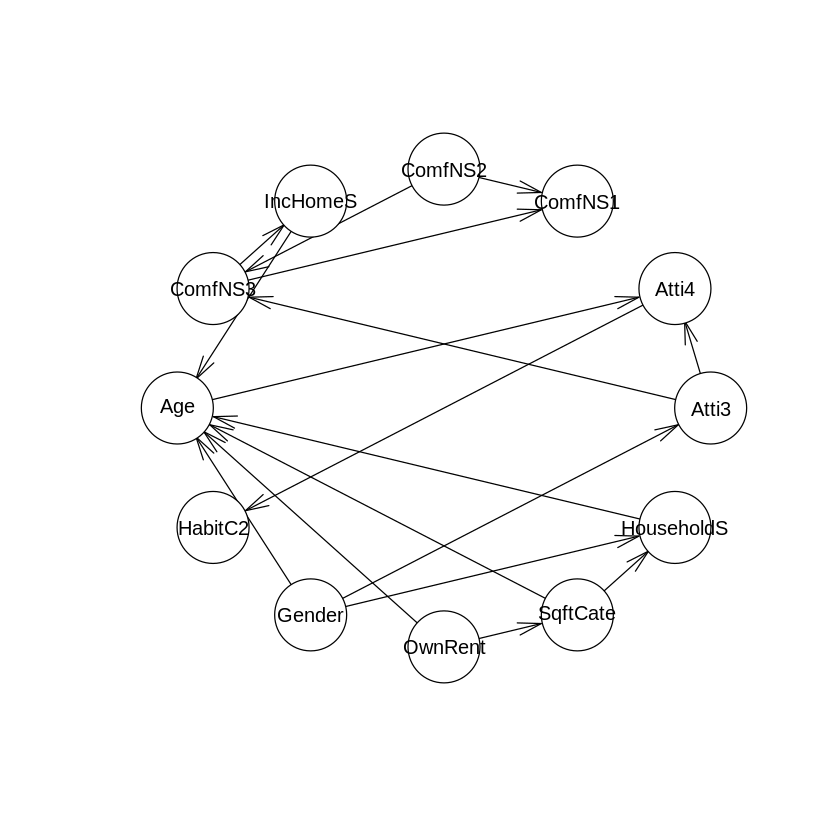

In [30]:
dd2 = data2[,c('IncHomeS', 'ComfNS3','Age','HabitC2',"Gender","OwnRent","SqftCate",
               "HouseholdS","Atti3","Atti4","ComfNS1","ComfNS2")]
for (i in 1:12) dd2[,i] <- as.double(dd2[,i])
dag2 = tabu(dd2)
plot(dag2)